# Using Reinforcement Learning to balance a CartPole

This work is done by :

* Benali khaoula

* Lasmar Raya

# <span style="color:red"> 0. Importing necessary libraries :</span>

In [2]:
import gym
import time
import keyboard
import math
import random
import matplotlib.pyplot as plt

# <span style="color:red">1. Loading the OpenAI gym environment :</span>

In [3]:
env = gym.make('CartPole-v0') 
#building our environment wich is a pole trying to balance on the top of a moving cart.

# <span style="color:red"> 2. Solving CartPole with Q_Learning :</span>

##### Preparing Q_Learning class :

In [16]:
class QLearning:
    def __init__(self):
        #exploration rate : the probability that our agent will explore the environment rather than exploit it.
        #setting it to 1 means the agent is going to explore the env. 
        self.exploration = 0.6
        #Learning rate alpha : set between 0 and 1. Setting it to 0 means that the Q-values are never updated, 
        #hence nothing is learned. Setting a high value such as 0.9 means that learning can occur quickly. 
        self.learning_rate = 0.3
        #Discount rate gamma : set between 0 and 1. This models the fact that future rewards are worth less 
        #than immediate rewards. Mathematically, the discount factor needs to be set less than 0 for the algorithm to converge. 
        self.discount_rate = 0.99
        #degrees is a set of possible degrees
        self.degrees = [2 * math.pi * x / 360 for x in range(360)]
        #State matrix Q wich is going to be updated each time 
        self.state_matrix = dict()
    
    
    #Initialization :
    def set_exploration(self, rate):
        self.exploration = rate

    def set_learning_rate(self, rate):
        self.learning_rate = rate

    def set_discount_rate(self, rate):
        self.discount_rate = rate

    # Choosing a random action or the best action depending on rand_nummultiplied by the exploration rate
    def get_action(self, state):
        rand_num = random.randint(0, 100)
        self.state_matrix[state] = self.state_matrix.get(state, [0, 0])

        if rand_num <= 100 * self.exploration:
            return random.randint(0, 1)

        return 0 if self.state_matrix[state][0] > self.state_matrix[state][1] else 1

    # Updating the q-value
    #prev_state : previous state
    #prev_action : previous action
    #new_state
    def update_q_value(self, prev_state, prev_action, new_state, reward, done):
        self.state_matrix[prev_state] = self.state_matrix.get(prev_state, [0, 0])
        self.state_matrix[new_state] = self.state_matrix.get(new_state, [0, 0])
        if not done:
            learned_value = self.learning_rate * (reward + self.discount_rate
                                                  * max(self.state_matrix[new_state][0],
                                                        self.state_matrix[new_state][1])
                                                  - self.state_matrix[prev_state][prev_action])
        else:
            learned_value = self.learning_rate * reward
        self.state_matrix[prev_state][prev_action] += learned_value

    # Returning the current state given the input parameters
    def get_state(self, pos, velocity, angle, ang_vel):
        # The different discretizations of the parameters
        pos_splits = [-1.5, -1, -0.5, 0, 0.5, 1.5]
        velocity_splits = [-1, -0.5, 0, 0.5, 1]
        angle_splits = [-self.degrees[9], -self.degrees[6], -self.degrees[3], self.degrees[0], self.degrees[3],
                        self.degrees[6], self.degrees[9]]
        angle_vel_splits = [-1, -0.7, -0.3, -0.1, 0, 0.1, 0.3, 0.7, 1]
        parameters = [pos_splits, velocity_splits, angle_splits, angle_vel_splits]
        inp_parameters = [pos, velocity, angle, ang_vel]
        state = "|"

        # Creating the state string
        # state=_pos|velocity|angle|angelVelocity|
        for x in range(len(parameters)):
            for y in range(len(parameters[x])):
                if inp_parameters[x] < parameters[x][y]:
                    state += str(parameters[x][y])
                    break
            state += str("|")
        return state


##### Adding a graph to view the change :

In [17]:
def add_point(frames):
    frames_vector.append(frames)
    pos_vector.append(len(frames_vector))

    # Updating the graph every 50 session
    if len(pos_vector) % 50 == 0:
        plt.close()
        plt.plot(pos_vector, frames_vector)
        plt.show()
        plt.pause(0.0001)

##### Setting up the agent and the environment :

In [18]:
#our agent is an instance of the QLearning class that we prepared before
agent = QLearning() 
#We start with a highest score of 0
highest_score = 0
# never rendering the game if set to true
abort_rendering = False  
# the key for rendering is pressed
rendering = False  
 # automatically starts rendering the game if the agent has survived for this long
render_low_limit = 10000 
# rendering every 50 episode
render_episode_interval = 50  # rendering every x episode

##### Setting HYPER-PARAMETERS :

In [19]:
expr = 0.6
lr = 0.4
agent.set_exploration(expr)
agent.set_learning_rate(lr)
agent.set_discount_rate(0.99)
num_episodes = 200
max_episode_length = 1000000
#Exponential decay schedule :Useful to lower the learning rate as the training progresse by applying an exponential decay 
#function to an optimizer step, given a provided initial learning rate.
exp_decay_denominator = 2000
lr_decay_denominator = 3000

##### Setting up the plot :

In [20]:
# y-coordinates
frames_vector = []  
# x-coordinates
pos_vector = []  
plt.ion()
figure = plt.figure()

<Figure size 432x288 with 0 Axes>

##### Training the agent :

Episode finished after 16 timesteps attempt 0 highest_score  15
Episode finished after 16 timesteps attempt 1 highest_score  15
Episode finished after 14 timesteps attempt 2 highest_score  15
Episode finished after 23 timesteps attempt 3 highest_score  22
Episode finished after 16 timesteps attempt 4 highest_score  22
Episode finished after 17 timesteps attempt 5 highest_score  22
Episode finished after 22 timesteps attempt 6 highest_score  22
Episode finished after 16 timesteps attempt 7 highest_score  22
Episode finished after 17 timesteps attempt 8 highest_score  22
Episode finished after 12 timesteps attempt 9 highest_score  22
Episode finished after 14 timesteps attempt 10 highest_score  22
Episode finished after 13 timesteps attempt 11 highest_score  22
Episode finished after 21 timesteps attempt 12 highest_score  22
Episode finished after 20 timesteps attempt 13 highest_score  22
Episode finished after 20 timesteps attempt 14 highest_score  22
Episode finished after 18 timesteps

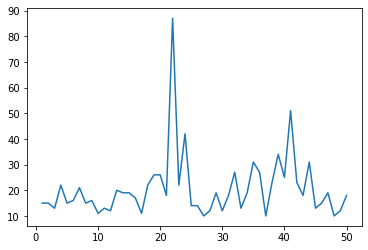

Episode finished after 15 timesteps attempt 50 highest_score  87
Episode finished after 15 timesteps attempt 51 highest_score  87
Episode finished after 54 timesteps attempt 52 highest_score  87
Episode finished after 41 timesteps attempt 53 highest_score  87
Episode finished after 21 timesteps attempt 54 highest_score  87
Episode finished after 24 timesteps attempt 55 highest_score  87
Episode finished after 28 timesteps attempt 56 highest_score  87
Episode finished after 79 timesteps attempt 57 highest_score  87
Episode finished after 12 timesteps attempt 58 highest_score  87
Episode finished after 17 timesteps attempt 59 highest_score  87
Episode finished after 52 timesteps attempt 60 highest_score  87
Episode finished after 22 timesteps attempt 61 highest_score  87
Episode finished after 10 timesteps attempt 62 highest_score  87
Episode finished after 21 timesteps attempt 63 highest_score  87
Episode finished after 17 timesteps attempt 64 highest_score  87
Episode finished after 18

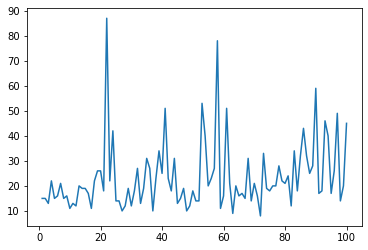

Episode finished after 20 timesteps attempt 100 highest_score  87
Episode finished after 22 timesteps attempt 101 highest_score  87
Episode finished after 10 timesteps attempt 102 highest_score  87
Episode finished after 25 timesteps attempt 103 highest_score  87
Episode finished after 16 timesteps attempt 104 highest_score  87
Episode finished after 34 timesteps attempt 105 highest_score  87
Episode finished after 12 timesteps attempt 106 highest_score  87
Episode finished after 34 timesteps attempt 107 highest_score  87
Episode finished after 13 timesteps attempt 108 highest_score  87
Episode finished after 14 timesteps attempt 109 highest_score  87
Episode finished after 20 timesteps attempt 110 highest_score  87
Episode finished after 24 timesteps attempt 111 highest_score  87
Episode finished after 20 timesteps attempt 112 highest_score  87
Episode finished after 17 timesteps attempt 113 highest_score  87
Episode finished after 41 timesteps attempt 114 highest_score  87
Episode fi

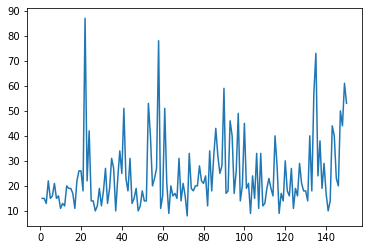

Episode finished after 87 timesteps attempt 150 highest_score  87
Episode finished after 47 timesteps attempt 151 highest_score  87
Episode finished after 19 timesteps attempt 152 highest_score  87
Episode finished after 42 timesteps attempt 153 highest_score  87
Episode finished after 22 timesteps attempt 154 highest_score  87
Episode finished after 36 timesteps attempt 155 highest_score  87
Episode finished after 22 timesteps attempt 156 highest_score  87
Episode finished after 58 timesteps attempt 157 highest_score  87
Episode finished after 43 timesteps attempt 158 highest_score  87
Episode finished after 15 timesteps attempt 159 highest_score  87
Episode finished after 55 timesteps attempt 160 highest_score  87
Episode finished after 37 timesteps attempt 161 highest_score  87
Episode finished after 20 timesteps attempt 162 highest_score  87
Episode finished after 17 timesteps attempt 163 highest_score  87
Episode finished after 14 timesteps attempt 164 highest_score  87
Episode fi

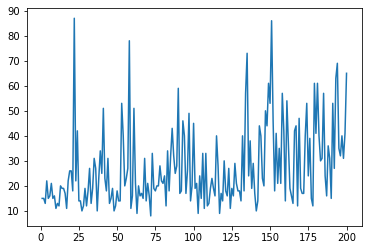

In [21]:
#We are going to run 200 attempts
for episode in range(num_episodes): 
    #observation is getting the environment state
    observation = env.reset()
    #First action is moving the cart to the left
    action = 0
    curState = -1

    # Upper limit of 1 mill. decisions in each episode
    for t in range(max_episode_length):

        # If the button a is pressed the environment is not going to be rendered
        if t % 100 == 0 and keyboard.is_pressed('a'):
            rendering = not rendering
            time.sleep(0.5)
        # Rendering the environment if requirements are met
        elif episode % render_episode_interval == 0 or t == render_low_limit:
            rendering = True
        if rendering and not abort_rendering:
            env.render()

        # execute the action and get new observation, the built in reward and done (if the game is over) is not used,
        # but a custom variant is instead implemented
        observation, _reward, _done, _ = env.step(action)

        # custom done function; the episode is over if it tilts more than 12 degrees or is out of the screen
        done = abs(observation[0]) >= 2.4 or abs(observation[2]) > 12 * math.pi / 180

        # updating current- and previous state
        prev_state = curState
        #observation = pos, velocity, angle, ang_velocity
        curState = agent.get_state(observation[0], observation[1], observation[2], observation[3])

        # Update Q_value of previous state_action pair
        if t > 0:
            # Custom reward function that penalizes tilting and distance from center
            reward = -1 if done else 1
            reward -= min(1, abs(observation[2] * 5)) - abs(observation[0] / 2)

            agent.update_q_value(prev_state, action, curState, reward, done)

            # Decreasing exploration- and learning_rate
            agent.set_exploration(max(0, expr - episode / exp_decay_denominator))
            agent.set_learning_rate(max(0.1, lr - episode / lr_decay_denominator))

            # Finding next action
            action = agent.get_action(curState)

            # Game is finished
            if done:
                highest_score = max(highest_score, t)  # longest time alive
                print("Episode finished after {} timesteps".format(t + 1) + " attempt " + str(
                    episode) + " highest_score ",
                      highest_score)
                add_point(t)  # adding point to graph
                rendering = False
                break

* As you can see our pole is balancing quite good but not in a very efficient.For 200 episodes it reaches 87 as a highest score which can definetly improved.It can be improved by repeating the training over and over again until reaching a perfect state matrix Q but this is a time consuming solution.

* However there is an other efficient solution which is creating a deep learning model that helps the agent choose the right action each time to get a maximized score.

* Now we are going to build that model:

# <span style="color:red"> 3. Solving Cartpole with  Deep Reinforcement Learning : </span>

## <span style="color:blue">3.1 Importing necessary libraries :</span> 

In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

## <span style="color:blue">3.2 Loading the environment :</span>

In [23]:
env = gym.make('CartPole-v0') #building our environment
states = env.observation_space.shape[0] #states
actions = env.action_space.n #actions

## <span style="color:blue">3.3 Building Deep Learning model :</span>

* For this part we are going to build a simple model as the cartpole balancing problem is not very complicated and doesn't require a big Neural Network architecture.

In [24]:
def build_model(states, actions):
    model = Sequential()
    #The first flatten layer is taking the different states as input
    model.add(Flatten(input_shape=(1,states)))
    #First hidden layer with 24 node 
    model.add(Dense(24, activation='relu'))
    #Second hidden layer with 24 node
    model.add(Dense(24, activation='relu'))
    #The output of the last layer is the best action to choose to maximize the score
    model.add(Dense(actions, activation='linear'))
    return model

In [25]:
model = build_model(states, actions)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 24)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


## <span style="color:blue">3.4 Building Agent with Keras-RL</span>

##### Importing necessary libraries : 

In [5]:
from rl.agents import DQNAgent #we are using DQNAgent from keras-rl agents
from rl.policy import BoltzmannQPolicy #we are using policy based reinforcement learning
from rl.memory import SequentialMemory

##### Building the agent :

* BoltzmannQPolicy :

In the exploration, we would like to exploit all the information present in the estimated Q values produced by our network. The Boltzmann exploration does this. Instead of always taking a random or optimal action, this approach involves choosing an action with weighted probabilities. To accomplish this, it uses a softmax over the networks estimates of value for each action. In this case, the action that the agent estimates to be the optimal one is most likely (but not guaranteed) to be chosen.


* SequentialMemory : 

Sequential memory is used by the DQN agent to store various states, actions, and rewards. It has the following data structures:

-Observations (dict): Observations returned by the environment

-Actions (int): Actions taken to obtain this observation

-Rewards (float): Rewards obtained by taking this action

-Terminals (Boolean)

In [6]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

## <span style="color:blue">3.5 Training </span>

In [23]:
dqn = build_agent(model, actions)#agent instantiation
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)#training

1
2
3
Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 6:48 - reward: 1.0000

C:\Users\khaoula\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
C:\Users\khaoula\anaconda3\lib\site-packages\rl\memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 76s 8ms/step - reward: 1.0000
110 episodes - episode_reward: 89.436 [9.000, 200.000] - loss: 3.487 - mae: 19.715 - mean_q: 39.862

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 91s 9ms/step - reward: 1.0000
52 episodes - episode_reward: 195.077 [170.000, 200.000] - loss: 5.260 - mae: 40.172 - mean_q: 81.084

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 92s 9ms/step - reward: 1.0000
50 episodes - episode_reward: 198.320 [175.000, 200.000] - loss: 5.484 - mae: 41.611 - mean_q: 83.548

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 97s 10ms/step - reward: 1.0000
51 episodes - episode_reward: 194.706 [169.000, 200.000] - loss: 10.830 - mae: 45.499 - mean_q: 91.303

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 103s 10ms/step - reward: 1.0000
done, took 458.851 seconds


## <span style="color:blue">3.6 Testing</span>

In [24]:
#let's test the performance of our model
scores = dqn.test(env, nb_episodes=100, visualize=False) 
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 197.000, steps: 197
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
Episode 21: reward: 200.000, steps: 200
Episode 22: reward: 200.000, steps: 200
Episode 23: reward: 200.000, steps: 200
Episode 24: reward: 200.000, steps: 200
Episode 25: reward: 

* Now the agent is trying to choose the best action each time and it gets a reward of 200 which is much better than 87 that we got with Q_Learning.

In [25]:
_ = dqn.test(env, nb_episodes=15, visualize=True)

Testing for 15 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 181.000, steps: 181
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 189.000, steps: 189
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 187.000, steps: 187
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200


## <span style="color:blue">3.7 Reloading agent from memory</span>

* And now we are going to save our model using the method save weights:

In [33]:
dqn.save_weights('C:/Users/khaoula/Desktop/DeepRL project/dqn_weights.h5f', overwrite=True)

In [29]:
del model
del dqn
del env

In [13]:
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [14]:
dqn.load_weights('C:/Users/khaoula/Desktop/DeepRL project/dqn_weights.h5f')

In [15]:
_ = dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...


C:\Users\khaoula\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


* The agent is doing a quite good job at choosing the right action each time,however it's getting 200 as a highest score and never goes higher than this value.That's why we are going to try another faster and more stable solution which is double deep Q_learning.

# <span style="color:red">4. Solving Cartpole with double deep Q_learning :</span>

#### Double Deep Q_Networks :




* Q_Value function are objects with high dimentionality,if we use a deep Q_Network to approximate them it will perform poorly.
To solve this we have to freeze the updated parameters while the online network is being updated through gradient descent.

* States and rewards are given by the environment so it's model free.

* It's off-policy.

* States and reward are obtained from a behaviour policy different from the online policy.

* Double Deep Q_Networks combine the advantage of choosing a particular action (A) and the advantage of a state (V : how good it is) and use them to get a final Q estimate using average to gain stability.

## <span style="color:blue">4.1 Importing necessary libraries :</span>

In [29]:
import os
import random
import gym
import pylab
import numpy as np
from collections import deque
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, RMSprop

## <span style="color:blue">4.2 Building the model and the agent :</span>

#### Build a deep learning Network :

* We are going to build a deep learning model with 3 hidden layers:    

     -first hidden layer : fully connected with 512 node.

     -second hidden layer : fully connected with 256 node.

     -third hidden layer : fully connected with 64 node.

* Output layer : fully connected with two nodes (action space) for left and right.

* This model takes as input the state and gives as output the best action to choose.

* Optimizer : we chose RMSprop with :

      -Learning rate = 0.00025

      -Discounting factor for the history/coming gradient (rho) = 0.95

      -Epsilon (The probability of taking a random action) =0.01

* Metrics : we chose accuracy to evaluate our model.

#### Building the agent :

* Init function : for setting hyperparameters of the model :

    -Episodes (Number of games the agent is going to play) = 1000

    -Gamma (The future discount reward) = 0.95

    -Epsilon (The exploration rate : proba of choosing an action randomly) = 1

    -Epsilon_dacay ( to decrease the exploration rate as the agent gets good ) = 0.999

    -Learning rate (How much the neural network learns at each iteration ) = 0.00025

    -Batch size ( Memory used by the Neural Network to learn ) = 64

* Remember function : Neural Networks always forget the previous experience because of replacing them with the current experience and that's why we are going to develop a remember function which add each time the state,the action and the next state to the memory (which is a deque with maxlength=2000) to use them later .

* Act function : Choosing the right action eaithor randomly or by using the model to predict the best action according to the value of epsilon.

* Replay function : It trains our model with considering previous experiences in the memory by :
  

    -sampling some random experiences from the memory ( minibatches).

    -Predicting a target for each minibatch and saving the reward received.   

* Load function function : to load a pretrained mode.

* Save model function : to save our model and reuse it later without doing the training part.

* Run function : for training our DQN model and saving it using previous functions.

----------Double DQN--------
Model: "CartPole DDQN model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               2560      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 130       
Total params: 150,466
Trainable params: 150,466
Non-trainable params: 0
_________________________________________________________________
Model: "CartPole DDQN model"
_________________________________________________

episode: 116/1000, score: 499, e: 0.01, average: 157.3
episode: 117/1000, score: 351, e: 0.01, average: 159.0
episode: 118/1000, score: 325, e: 0.01, average: 160.4
episode: 119/1000, score: 387, e: 0.01, average: 162.3
episode: 120/1000, score: 422, e: 0.01, average: 164.4
episode: 121/1000, score: 365, e: 0.01, average: 166.0
episode: 122/1000, score: 293, e: 0.01, average: 167.1
episode: 123/1000, score: 402, e: 0.01, average: 169.0
episode: 124/1000, score: 348, e: 0.01, average: 170.4
episode: 125/1000, score: 262, e: 0.01, average: 171.1
episode: 126/1000, score: 238, e: 0.01, average: 171.7
episode: 127/1000, score: 628, e: 0.01, average: 175.2
episode: 128/1000, score: 297, e: 0.01, average: 176.2
episode: 129/1000, score: 688, e: 0.01, average: 180.1
episode: 130/1000, score: 299, e: 0.01, average: 181.0
episode: 131/1000, score: 1179, e: 0.01, average: 188.6
episode: 132/1000, score: 1810, e: 0.01, average: 200.8
episode: 133/1000, score: 238, e: 0.01, average: 201.0
episode:

episode: 265/1000, score: 14, e: 0.01, average: 238.1
episode: 266/1000, score: 13, e: 0.01, average: 237.2
episode: 267/1000, score: 18, e: 0.01, average: 236.4
episode: 268/1000, score: 10, e: 0.01, average: 235.6
episode: 269/1000, score: 15, e: 0.01, average: 234.8
episode: 270/1000, score: 14, e: 0.01, average: 234.0
episode: 271/1000, score: 13, e: 0.01, average: 233.1
episode: 272/1000, score: 19, e: 0.01, average: 232.4
episode: 273/1000, score: 32, e: 0.01, average: 231.6
episode: 274/1000, score: 22, e: 0.01, average: 230.9
episode: 275/1000, score: 41, e: 0.01, average: 230.2
episode: 276/1000, score: 89, e: 0.01, average: 229.7
episode: 277/1000, score: 29, e: 0.01, average: 228.9
episode: 278/1000, score: 37, e: 0.01, average: 228.3
episode: 279/1000, score: 31, e: 0.01, average: 227.6
episode: 280/1000, score: 42, e: 0.01, average: 226.9
episode: 281/1000, score: 29, e: 0.01, average: 226.2
episode: 282/1000, score: 30, e: 0.01, average: 225.5
episode: 283/1000, score: 25

episode: 415/1000, score: 185, e: 0.01, average: 218.4
episode: 416/1000, score: 208, e: 0.01, average: 218.4
episode: 417/1000, score: 247, e: 0.01, average: 218.5
episode: 418/1000, score: 340, e: 0.01, average: 218.7
episode: 419/1000, score: 273, e: 0.01, average: 218.9
episode: 420/1000, score: 214, e: 0.01, average: 218.9
episode: 421/1000, score: 118, e: 0.01, average: 218.6
episode: 422/1000, score: 77, e: 0.01, average: 218.3
episode: 423/1000, score: 214, e: 0.01, average: 218.3
episode: 424/1000, score: 154, e: 0.01, average: 218.1
episode: 425/1000, score: 192, e: 0.01, average: 218.1
episode: 426/1000, score: 153, e: 0.01, average: 217.9
episode: 427/1000, score: 133, e: 0.01, average: 217.7
episode: 428/1000, score: 128, e: 0.01, average: 217.5
episode: 429/1000, score: 128, e: 0.01, average: 217.3
episode: 430/1000, score: 122, e: 0.01, average: 217.1
episode: 431/1000, score: 156, e: 0.01, average: 216.9
episode: 432/1000, score: 160, e: 0.01, average: 216.8
episode: 43

episode: 575/1000, score: 601, e: 0.01, average: 226.8
episode: 576/1000, score: 756, e: 0.01, average: 227.7
episode: 577/1000, score: 383, e: 0.01, average: 228.0
episode: 578/1000, score: 287, e: 0.01, average: 228.1
episode: 579/1000, score: 317, e: 0.01, average: 228.3
episode: 580/1000, score: 448, e: 0.01, average: 228.6
episode: 581/1000, score: 393, e: 0.01, average: 228.9
episode: 582/1000, score: 434, e: 0.01, average: 229.3
episode: 583/1000, score: 66, e: 0.01, average: 229.0
episode: 584/1000, score: 52, e: 0.01, average: 228.7
episode: 585/1000, score: 49, e: 0.01, average: 228.4
episode: 586/1000, score: 308, e: 0.01, average: 228.5
episode: 587/1000, score: 166, e: 0.01, average: 228.4
episode: 588/1000, score: 146, e: 0.01, average: 228.3
episode: 589/1000, score: 194, e: 0.01, average: 228.2
episode: 590/1000, score: 251, e: 0.01, average: 228.3
episode: 591/1000, score: 187, e: 0.01, average: 228.2
episode: 592/1000, score: 216, e: 0.01, average: 228.2
episode: 593/

episode: 725/1000, score: 170, e: 0.01, average: 228.2
episode: 726/1000, score: 145, e: 0.01, average: 228.1
episode: 727/1000, score: 173, e: 0.01, average: 228.0
episode: 728/1000, score: 179, e: 0.01, average: 227.9
episode: 729/1000, score: 190, e: 0.01, average: 227.9
episode: 730/1000, score: 541, e: 0.01, average: 228.3
episode: 731/1000, score: 550, e: 0.01, average: 228.7
episode: 732/1000, score: 506, e: 0.01, average: 229.1
episode: 733/1000, score: 512, e: 0.01, average: 229.5
episode: 734/1000, score: 159, e: 0.01, average: 229.4
episode: 735/1000, score: 155, e: 0.01, average: 229.3
episode: 736/1000, score: 650, e: 0.01, average: 229.9
episode: 737/1000, score: 149, e: 0.01, average: 229.8
episode: 738/1000, score: 497, e: 0.01, average: 230.1
episode: 739/1000, score: 534, e: 0.01, average: 230.5
episode: 740/1000, score: 406, e: 0.01, average: 230.8
episode: 741/1000, score: 576, e: 0.01, average: 231.2
episode: 742/1000, score: 467, e: 0.01, average: 231.6
episode: 7

episode: 874/1000, score: 18, e: 0.01, average: 238.9
episode: 875/1000, score: 17, e: 0.01, average: 238.6
episode: 876/1000, score: 17, e: 0.01, average: 238.4
episode: 877/1000, score: 15, e: 0.01, average: 238.1
episode: 878/1000, score: 20, e: 0.01, average: 237.9
episode: 879/1000, score: 17, e: 0.01, average: 237.6
episode: 880/1000, score: 20, e: 0.01, average: 237.4
episode: 881/1000, score: 20, e: 0.01, average: 237.1
episode: 882/1000, score: 28, e: 0.01, average: 236.9
episode: 883/1000, score: 31, e: 0.01, average: 236.7
episode: 884/1000, score: 40, e: 0.01, average: 236.4
episode: 885/1000, score: 102, e: 0.01, average: 236.3
episode: 886/1000, score: 2579, e: 0.01, average: 238.9
episode: 887/1000, score: 125, e: 0.01, average: 238.8
episode: 888/1000, score: 186, e: 0.01, average: 238.7
episode: 889/1000, score: 156, e: 0.01, average: 238.7
episode: 890/1000, score: 354, e: 0.01, average: 238.8
episode: 891/1000, score: 966, e: 0.01, average: 239.6
episode: 892/1000, s

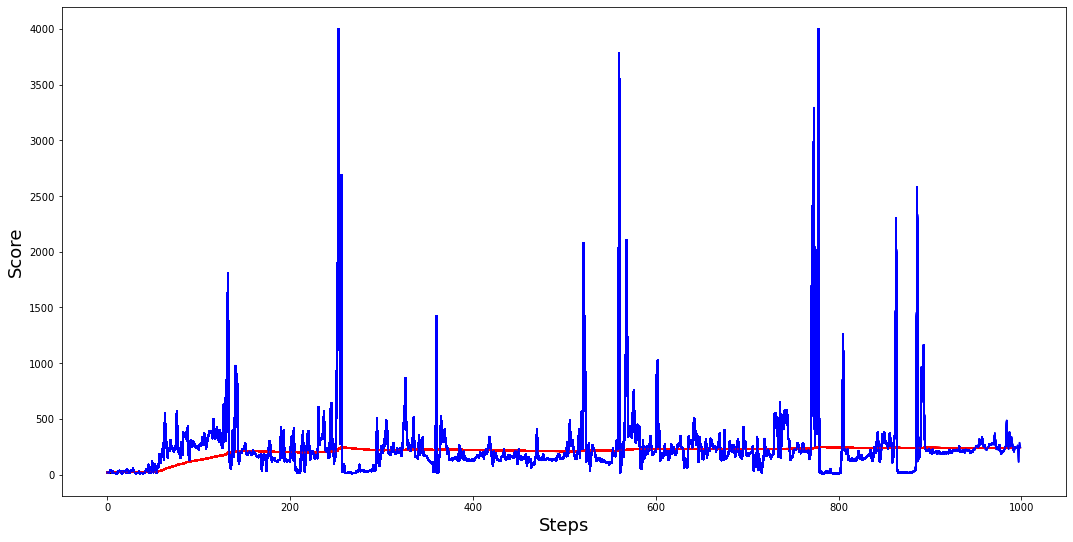

In [18]:
def OurModel(input_shape, action_space):
    X_input = Input(input_shape)
    X = X_input

    # 'Dense' is the basic form of a neural network layer
    # Input Layer of state size(4) and Hidden Layer with 512 nodes
    X = Dense(512, input_shape=input_shape, activation="relu", kernel_initializer='he_uniform')(X)

    # Hidden layer with 256 nodes
    X = Dense(256, activation="relu", kernel_initializer='he_uniform')(X)
    
    # Hidden layer with 64 nodes
    X = Dense(64, activation="relu", kernel_initializer='he_uniform')(X)

    # Output Layer with # of actions: 2 nodes (left, right)
    X = Dense(action_space, activation="linear", kernel_initializer='he_uniform')(X)

    model = Model(inputs = X_input, outputs = X, name='CartPole DDQN model')
    model.compile(loss="mean_squared_error", optimizer=RMSprop(lr=0.00025, rho=0.95, epsilon=0.01), metrics=["accuracy"])

    model.summary()
    return model

class DQNAgent:
    def __init__(self, env_name):
        self.env_name = env_name       
        self.env = gym.make(env_name)
        self.env.seed(0)  
        # by default, CartPole-v1 has max episode steps = 500
        self.env._max_episode_steps = 4000
        self.state_size = self.env.observation_space.shape[0]
        self.action_size = self.env.action_space.n

        self.EPISODES = 1000
        self.memory = deque(maxlen=2000)
        
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.999
        self.batch_size = 32
        self.train_start = 1000

        # defining model parameters
        self.ddqn = True
        self.Soft_Update = False

        self.TAU = 0.1 # target network soft update hyperparameter

        self.Save_Path = 'Models'
        self.scores, self.episodes, self.average = [], [], []
        
        if self.ddqn:
            print("----------Double DQN--------")
            self.Model_name = os.path.join(self.Save_Path,"DDQN_"+self.env_name+".h5")
        else:
            print("-------------DQN------------")
            self.Model_name = os.path.join(self.Save_Path,"DQN_"+self.env_name+".h5")
        
        # create main model
        self.model = OurModel(input_shape=(self.state_size,), action_space = self.action_size)
        self.target_model = OurModel(input_shape=(self.state_size,), action_space = self.action_size)

    # after some time interval update the target model to be same with model
    def update_target_model(self):
        if not self.Soft_Update and self.ddqn:
            self.target_model.set_weights(self.model.get_weights())
            return
        if self.Soft_Update and self.ddqn:
            q_model_theta = self.model.get_weights()
            target_model_theta = self.target_model.get_weights()
            counter = 0
            for q_weight, target_weight in zip(q_model_theta, target_model_theta):
                target_weight = target_weight * (1-self.TAU) + q_weight * self.TAU
                target_model_theta[counter] = target_weight
                counter += 1
            self.target_model.set_weights(target_model_theta)

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        if len(self.memory) > self.train_start:
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

    def act(self, state):
        if np.random.random() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            return np.argmax(self.model.predict(state))

    def replay(self):
        if len(self.memory) < self.train_start:
            return
        # Randomly sample minibatch from the memory
        minibatch = random.sample(self.memory, min(self.batch_size, self.batch_size))

        state = np.zeros((self.batch_size, self.state_size))
        next_state = np.zeros((self.batch_size, self.state_size))
        action, reward, done = [], [], []

        # do this before prediction
        # for speedup, this could be done on the tensor level
        # but easier to understand using a loop
        for i in range(self.batch_size):
            state[i] = minibatch[i][0]
            action.append(minibatch[i][1])
            reward.append(minibatch[i][2])
            next_state[i] = minibatch[i][3]
            done.append(minibatch[i][4])

        # do batch prediction to save speed
        target = self.model.predict(state)
        target_next = self.model.predict(next_state)
        target_val = self.target_model.predict(next_state)

        for i in range(len(minibatch)):
            # correction on the Q value for the action used
            if done[i]:
                target[i][action[i]] = reward[i]
            else:
                if self.ddqn: # Double - DQN
                    # current Q Network selects the action
                    # a'_max = argmax_a' Q(s', a')
                    a = np.argmax(target_next[i])
                    # target Q Network evaluates the action
                    # Q_max = Q_target(s', a'_max)
                    target[i][action[i]] = reward[i] + self.gamma * (target_val[i][a])   
                else: # Standard - DQN
                    # DQN chooses the max Q value among next actions
                    # selection and evaluation of action is on the target Q Network
                    # Q_max = max_a' Q_target(s', a')
                    target[i][action[i]] = reward[i] + self.gamma * (np.amax(target_next[i]))

        # Train the Neural Network with batches
        self.model.fit(state, target, batch_size=self.batch_size, verbose=0)


    def load(self, name):
        self.model = load_model(name)

    def save(self, name):
        self.model.save(name)

    pylab.figure(figsize=(18, 9))
    def PlotModel(self, score, episode):
        self.scores.append(score)
        self.episodes.append(episode)
        self.average.append(sum(self.scores) / len(self.scores))
        pylab.plot(self.episodes, self.average, 'r')
        pylab.plot(self.episodes, self.scores, 'b')
        pylab.ylabel('Score', fontsize=18)
        pylab.xlabel('Steps', fontsize=18)
        dqn = 'DQN_'
        softupdate = ''
        if self.ddqn:
            dqn = 'DDQN_'
        if self.Soft_Update:
            softupdate = '_soft'
        try:
            pylab.savefig(dqn+self.env_name+softupdate+".png")
        except OSError:
            pass

        return str(self.average[-1])[:5]
    
    def run(self):
        for e in range(self.EPISODES):
            state = self.env.reset()
            state = np.reshape(state, [1, self.state_size])
            done = False
            i = 0
            while not done:
                #self.env.render()
                action = self.act(state)
                next_state, reward, done, _ = self.env.step(action)
                next_state = np.reshape(next_state, [1, self.state_size])
                if not done or i == self.env._max_episode_steps-1:
                    reward = reward
                else:
                    reward = -100
                self.remember(state, action, reward, next_state, done)
                state = next_state
                i += 1
                if done:
                    # every step update target model
                    self.update_target_model()
                    
                    # every episode, plot the result
                    average = self.PlotModel(i, e)
                     
                    print("episode: {}/{}, score: {}, e: {:.2}, average: {}".format(e, self.EPISODES, i, self.epsilon, average))
                    if i == self.env._max_episode_steps:
                        print("Saving trained model as cartpole-ddqn.h5")
                        self.save("cartpole-ddqn.h5")
                        break
                self.replay()

    def test(self):
        self.load("cartpole-ddqn.h5")
        for e in range(self.EPISODES):
            state = self.env.reset()
            state = np.reshape(state, [1, self.state_size])
            done = False
            i = 0
            while not done:
                self.env.render()
                action = np.argmax(self.model.predict(state))
                next_state, reward, done, _ = self.env.step(action)
                state = np.reshape(next_state, [1, self.state_size])
                i += 1
                if done:
                    print("episode: {}/{}, score: {}".format(e, self.EPISODES, i))
                    break

if __name__ == "__main__":
    env_name = 'CartPole-v1'
    agent = DQNAgent(env_name)
    agent.run()
    

## <span style="color:blue">4.5 Testing the DDQN  :</span>

In [19]:
if __name__ == "__main__":
    env_name = 'CartPole-v1'
    agent = DQNAgent(env_name)
    #agent.run()
    agent.test()

----------Double DQN--------
Model: "CartPole DDQN model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               2560      
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_21 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 130       
Total params: 150,466
Trainable params: 150,466
Non-trainable params: 0
_________________________________________________________________
Model: "CartPole DDQN model"
_________________________________________________

episode: 215/1000, score: 20
episode: 216/1000, score: 17
episode: 217/1000, score: 22
episode: 218/1000, score: 23
episode: 219/1000, score: 19
episode: 220/1000, score: 17
episode: 221/1000, score: 18
episode: 222/1000, score: 18
episode: 223/1000, score: 22
episode: 224/1000, score: 20
episode: 225/1000, score: 22
episode: 226/1000, score: 23
episode: 227/1000, score: 22
episode: 228/1000, score: 20
episode: 229/1000, score: 25
episode: 230/1000, score: 21
episode: 231/1000, score: 22
episode: 232/1000, score: 20
episode: 233/1000, score: 22
episode: 234/1000, score: 22
episode: 235/1000, score: 16
episode: 236/1000, score: 20
episode: 237/1000, score: 22
episode: 238/1000, score: 20
episode: 239/1000, score: 24
episode: 240/1000, score: 22
episode: 241/1000, score: 19
episode: 242/1000, score: 20
episode: 243/1000, score: 22
episode: 244/1000, score: 22
episode: 245/1000, score: 23
episode: 246/1000, score: 19
episode: 247/1000, score: 18
episode: 248/1000, score: 20
episode: 249/1

episode: 498/1000, score: 18
episode: 499/1000, score: 18
episode: 500/1000, score: 21
episode: 501/1000, score: 25
episode: 502/1000, score: 22
episode: 503/1000, score: 23
episode: 504/1000, score: 18
episode: 505/1000, score: 16
episode: 506/1000, score: 17
episode: 507/1000, score: 18
episode: 508/1000, score: 22
episode: 509/1000, score: 23
episode: 510/1000, score: 19
episode: 511/1000, score: 23
episode: 512/1000, score: 14
episode: 513/1000, score: 16
episode: 514/1000, score: 23
episode: 515/1000, score: 18
episode: 516/1000, score: 21
episode: 517/1000, score: 22
episode: 518/1000, score: 22
episode: 519/1000, score: 21
episode: 520/1000, score: 16
episode: 521/1000, score: 16
episode: 522/1000, score: 23
episode: 523/1000, score: 13
episode: 524/1000, score: 22
episode: 525/1000, score: 22
episode: 526/1000, score: 20
episode: 527/1000, score: 22
episode: 528/1000, score: 18
episode: 529/1000, score: 19
episode: 530/1000, score: 14
episode: 531/1000, score: 18
episode: 532/1

episode: 781/1000, score: 23
episode: 782/1000, score: 25
episode: 783/1000, score: 19
episode: 784/1000, score: 20
episode: 785/1000, score: 18
episode: 786/1000, score: 23
episode: 787/1000, score: 15
episode: 788/1000, score: 18
episode: 789/1000, score: 23
episode: 790/1000, score: 20
episode: 791/1000, score: 17
episode: 792/1000, score: 20
episode: 793/1000, score: 21
episode: 794/1000, score: 20
episode: 795/1000, score: 22
episode: 796/1000, score: 14
episode: 797/1000, score: 15
episode: 798/1000, score: 20
episode: 799/1000, score: 20
episode: 800/1000, score: 22
episode: 801/1000, score: 18
episode: 802/1000, score: 19
episode: 803/1000, score: 21
episode: 804/1000, score: 21
episode: 805/1000, score: 18
episode: 806/1000, score: 20
episode: 807/1000, score: 18
episode: 808/1000, score: 22
episode: 809/1000, score: 23
episode: 810/1000, score: 18
episode: 811/1000, score: 24
episode: 812/1000, score: 20
episode: 813/1000, score: 22
episode: 814/1000, score: 22
episode: 815/1